<a href="https://colab.research.google.com/github/SairajNeelam/EDA---Google-Play-Store/blob/main/EDA_Google_Play_Store_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement :**

### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

### <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

### <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **About Google Play :**

> ### ▶ **Google Play is an online store where people go to find and enjoy their favorite apps, games, movies, TV shows, books, and more on their Android devices.**


> ### ▶ **Google Play offers millions of apps, games, and other content for people to choose from. The store provides a search function, editorial content, user reviews, and more to help people find the best content for their individual needs.**

> ### ▶ **To be successful, Google Play must work to meet the needs of both users and developers. To help users find high quality, engaging apps Google works hard to ensure the Play Store is safe, secure, and convenient.**












## **Why Exploratory Data Analysis is important ?**

> **It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists. It performs to define and refine our important features variable selection, that will be used in our model.**




## **Content Table :**

### **1. Exploring the Data**
### **2. Data Wrangling (Check sanity of data and clean the data)**
### **3. Feature Engineering**
### **4. Data Vizualization**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
# %matplotlib inline              # It is a magic function that renders the figure in a notebook
import seaborn as sns             # for data visualization
import plotly.express as px       # for data visualization

In [3]:
GPStore = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Datasets/Google Play Store/Play Store Data.csv')
user_review = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Datasets/Google Play Store/User Reviews.csv')

In [4]:
GPStore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
print(GPStore.shape)
print(user_review.shape)

(10841, 13)
(64295, 5)


# **GPStore Data**

In [7]:
# prints a summary of the dataframe rows and columns, including information on the datatypes and non-null values
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
GPStore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## ***Data Exploration and Data Wrangling***


> Explore all columns one by one and check for invalid data and clean data accordingly.



In [9]:
list(GPStore.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

### Column ▶ App



In [10]:
# get the count/frequency of all the unique values of the specified column
GPStore['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
                                                    ..
dk                                                   1
K-pop Music                                          1
The birth                                            1
Grand Bat Superhero Flying Assault Rescue Mission    1
CJ Infinity                                          1
Name: App, Length: 9660, dtype: int64

**As we see here that there are duplicates of the same app multiple times, therefore we need to remove the dulplicate data**

In [11]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

# remove the duplicate values from the dataframe, specifying the column name in the subset parameter 
GPStore = GPStore.drop_duplicates(subset=['App'], keep = 'first')

# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

(10841, 13)
(9660, 13)


### Column ▶ Category

In [12]:
# get all the unique values present in the specified column
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

**In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry.**

In [13]:
# dataframe filtering based on a condition
GPStore[GPStore.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**What we observe here is that, the column values are shifted to left by one position, i.e. 1.9 should be rating, 19.0 should be reviews, 3.0M should be size,... and so on.**

**There is no category for this App, so we can drop this row**

In [14]:
# remove the row with the specified index; axis 0 implies along the rows; axis 1 along the columns
GPStore=GPStore.drop([10472],axis=0)

In [15]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(9659, 13)

### Column ▶ Rating

**Rating column is the only feature having float datatype, so let us check statistical summary for it**

In [16]:
# statistical summary of the specified numerical variable
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [17]:
GPStore['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

**All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.**

In [18]:
# find the total no. of missing values present in the specified column
GPStore.Rating.isnull().sum()

1463

In [19]:
# lets see what percentage of data is missing from this feature
print(f'{round((GPStore.Rating.isnull().sum()*100)/GPStore.shape[0],2)}% of data is missing from Rating Column')

15.15% of data is missing from Rating Column


**We will impute the missing values later**

### Column ▶ Reviews

In [20]:
# displays frequency measures for a non-numerical column
GPStore.Reviews.describe()    # The datatype for the reviews column is string 

count     9659
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

In [21]:
# check for any non numeric value 
GPStore.Reviews.str.isnumeric().sum()   

9659

In [22]:
# convert the 'Review' column to numeric
GPStore.Reviews=pd.to_numeric(GPStore.Reviews)

In [23]:
# statistical summary of the specified numerical variable
GPStore.Reviews.describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Column ▶ Size

In [24]:
# get the count/frequency of all the unique values of the specified column
GPStore.Size.value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
860k                     1
437k                     1
942k                     1
400k                     1
598k                     1
Name: Size, Length: 461, dtype: int64

**In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes.**

In [25]:
# replace all the 'Varies with device' with 0
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'M' representing Million with ''
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('M','') if 'M' in x else x)

# replace all the 'k' representing thousand (convert it in MB's)
GPStore.Size = GPStore.Size.apply(lambda x: round(float(x.replace('k',''))/1024,1) if 'k' in x else x)

In [26]:
# convert to float datatype
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [27]:
GPStore.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [28]:
# statistical summary of the specified numerical variable
GPStore.Size.describe()

count    9659.000000
mean       17.804058
std        21.495550
min         0.000000
25%         2.900000
50%         9.100000
75%        25.000000
max       100.000000
Name: Size, dtype: float64

In [29]:
GPStore=GPStore.rename(columns={'Size':'Size_in_MB'})   # rename the Size column to Size_in_MB 

### Column ▶ Installs

In [30]:
GPStore.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9659, dtype: object

**The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric.**

In [31]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
GPStore.Installs.value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [32]:
# convert to numeric datatype
GPStore.Installs=pd.to_numeric(GPStore.Installs)

In [33]:
GPStore['Installs'].describe()

count    9.659000e+03
mean     7.777507e+06
std      5.375828e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Column ▶ Type

In [34]:
# get the count/frequency of all the unique values of the specified column
GPStore.Type.value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

**All Good in this column. The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.**

### Column ▶ Price

In [35]:
GPStore.Price.value_counts()

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$1.75         1
$394.99       1
$2.50         1
$2.90         1
$4.84         1
Name: Price, Length: 92, dtype: int64

**The data for the paid apps is prefix with "\$" character. Remove "$" before the price and convert it to numeric**

In [36]:
# removing the dollar sign from the string
GPStore.Price=GPStore.Price.apply(lambda x: x.strip('$'))

In [37]:
# converting to numeric datatype
GPStore.Price=pd.to_numeric(GPStore.Price)

In [38]:
# statistical summary of the specified numerical variable
GPStore.Price.describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Column ▶ Content Rating

In [39]:
# get all the unique values present in the specified column
GPStore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
GPStore['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Column ▶ Genres

In [41]:
# get all the unique values present in the specified column
GPStore.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

**Does not seem to be anything unusual here, so no cleaning required for this column**

**Although we can create the sub-genres for this**

### Column ▶ Last Update

**Check for the data and convert it into date format**

In [42]:
# display the head or top 5 columns of the dataframe
GPStore['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [43]:
# convert to datetime datatype
GPStore['Last Updated']=pd.to_datetime(GPStore['Last Updated'])

In [44]:
# display the head or top 5 columns of the dataframe
GPStore['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Column ▶ Current Version

In [45]:
# count the no. of null values in the dataframe
GPStore['Current Ver'].isnull().sum()

8

In [46]:
# get the count/frequency of all the unique values of the specified column
GPStore['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
2.15.2                   1
2.0.7.4                  1
4.26                     1
1.2.0.27                 1
2.1.20                   1
Name: Current Ver, Length: 2817, dtype: int64

### Column ▶ Android version

In [47]:
# get all the unique values present in the specified column
GPStore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## ***Feature Engineering***

### Column ▶ Genre 

**We create the sub genre feature from genre column**

In [48]:
# in case an app belongs to 2 genres, the values are separated by ';'. Split the values with ; as a separator
Genre_split = GPStore.Genres.str.split(';',expand=True)

In [49]:
# in case an app belongs to 2 genres, the values are separated by ';'. Split the values with ; as a separator
Genre_split = GPStore.Genres.str.split(';',expand=True)

# add column names
Genre_split.columns = ['Genres', 'Sub-Genres']

# display the head or top 5 columns of the dataframe
Genre_split.head()

,Genres,Sub-Genres
0,Art & Design,None
1,Art & Design,Pretend Play
2,Art & Design,None
3,Art & Design,None
4,Art & Design,Creativity


In [50]:
# remove the 'Genres' column from the dataframe
GPStore.drop('Genres', axis=1,inplace=True)

In [51]:
# merge the two dataframes
GPStore=GPStore.merge(Genre_split, left_index=True, right_index=True)

### Column ▶ Rating

In [52]:
# converting the Rating feature to string type and storing in Rating_Scale
GPStore['Rating_Scale'] = GPStore['Rating'].astype(str)

In [53]:
GPStore['Rating_Scale'].unique()

array(['4.1', '3.9', '4.7', '4.5', '4.3', '4.4', '3.8', '4.2', '4.6',
       '3.2', '4.0', 'nan', '4.8', '4.9', '3.6', '3.7', '3.3', '3.4',
       '3.5', '3.1', '5.0', '2.6', '3.0', '1.9', '2.5', '2.8', '2.7',
       '1.0', '2.9', '2.3', '2.2', '1.7', '2.0', '1.8', '2.4', '1.6',
       '2.1', '1.4', '1.5', '1.2'], dtype=object)

In [54]:
# based on the scale replacing the ratings with scale from Poor to Excellent
GPStore['Rating_Scale'] = GPStore.Rating_Scale.apply(lambda x: x.replace(x,'Poor') if(0<=float(x)<1) else 
                                                     x.replace(x,'Bad') if(1<=float(x)<2) else
                                                     x.replace(x,'Okay') if(2<=float(x)<3) else
                                                     x.replace(x,'Good') if(3<=float(x)<4) else
                                                     x.replace(x,'Excellent') if(4<=float(x)<=5) else
                                                     x.replace(x,'Missing'))

In [55]:
GPStore['Rating_Scale'].unique()

array(['Excellent', 'Good', 'Missing', 'Okay', 'Bad'], dtype=object)

In [56]:
GPStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MB', 'Installs',
       'Type', 'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver', 'Genres', 'Sub-Genres', 'Rating_Scale'],
      dtype='object')

### ***Saving the cleaned dataset in csv format***

In [57]:
# save the dataframe
# GPStore.to_csv('Play Store Data Clean.csv',index=False)

## ***Data Visualization***

### **Correlation Heatmap**

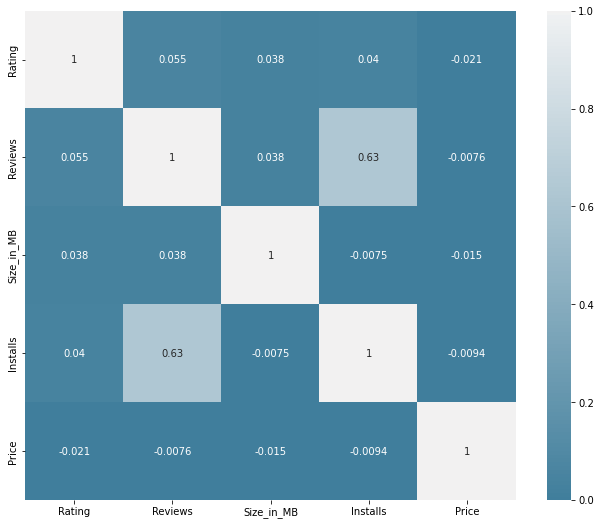

In [58]:
%matplotlib inline


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

corr = GPStore.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,annot=True,cmap=cmap,center=True,cbar=True,vmin=0,vmax=1);

### PairPlot

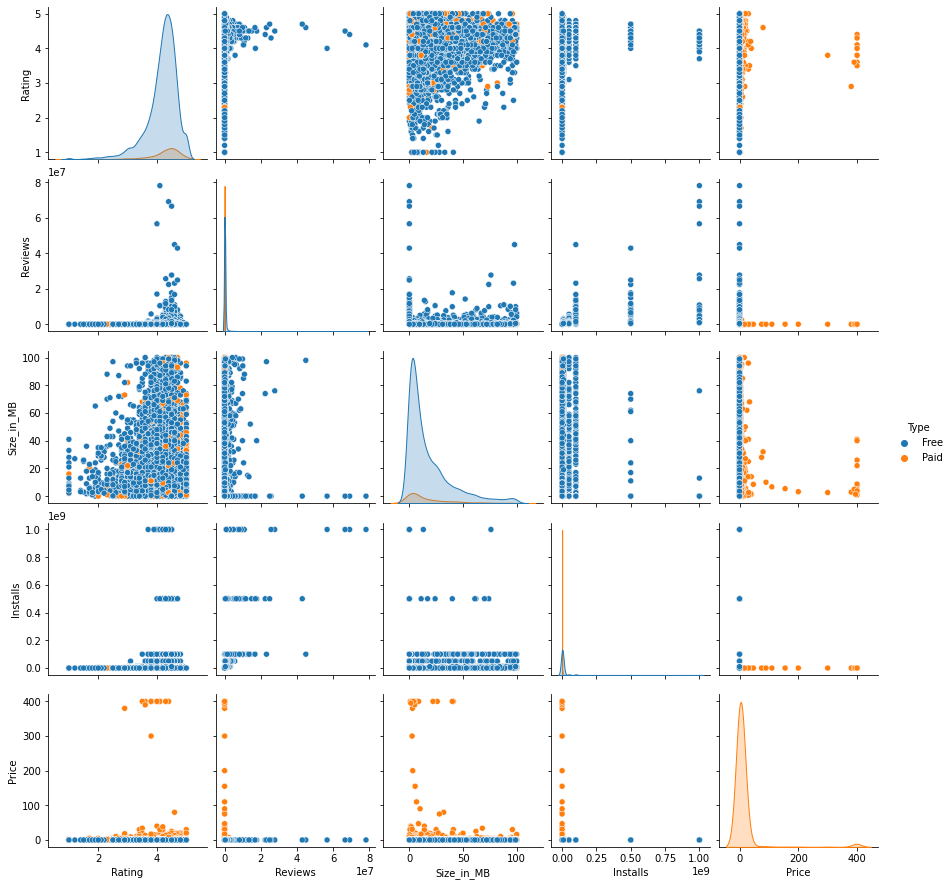

In [59]:
sns.pairplot(data=GPStore, hue='Type');

### Vizualization based on ▶ Category

**Number of Apps in each Category**

In [60]:
# Calculating number of applications available in each category and storing it in variable categories.
categories=GPStore.groupby('Category')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [61]:
# Resetting the names of columns here
categories.set_axis(['category','count'],axis=1,inplace=True)

In [62]:
# Plotting a bar plot representing the total count of applications in each category using plotly.
px.bar(data_frame=categories,x=categories['category'],y=categories['count'], color = 'Category',
       text="count",title='Total Number of Application In Each Category')

**Free and Paid apps in each category**

In [63]:
# grouping by the 'Category' and 'Type' of the app
# storing the count or number of apps present in each category for each of the types
app_cat_type = GPStore[['Category','App','Type']].groupby(['Category','Type'],as_index=False).count().sort_values(by='App',ascending=False)
app_cat_type

,Category,Type,App
20,FAMILY,Free,1648
26,GAME,Free,877
55,TOOLS,Free,749
7,BUSINESS,Free,408
33,LIFESTYLE,Free,350
...,...,...,...
25,FOOD_AND_DRINK,Paid,2
42,PARENTING,Paid,2
40,NEWS_AND_MAGAZINES,Paid,2
19,EVENTS,Paid,1


In [64]:
# With the help of plotly bar plot experimenting which kind of applications are being updated the most.
px.bar(data_frame=app_cat_type ,x='Category',y='App',color='Type',
       text='App',title='Total Number Of Free and Paid Applications In Each Category')

**Installs based on Category**

In [72]:
# Calculating number of applications available in each category and storing it in variable categories.
installs = GPStore.groupby(['Category','Type'],as_index=False).sum().sort_values(by='Installs',ascending=False)

In [73]:
installs.head()

,Category,Type,Rating,Reviews,Size_in_MB,Installs,Price
26,GAME,Free,3541.3,620725858,33911.4,13857924450,0.0
10,COMMUNICATION,Free,965.7,285727154,2635.8,11036916201,0.0
55,TOOLS,Free,2637.7,229184641,6164.2,8000044474,0.0
47,PRODUCTIVITY,Free,1183.5,55418928,3450.9,5791679314,0.0
51,SOCIAL,Free,854.8,227927559,3001.3,5487861902,0.0


In [74]:
# Plotting a bar plot using plotly to know which categories of application takes most space inside the google play store
px.bar(data_frame=installs ,x="Category",y='Installs', color='Type',
       title="Categories Vs Installs",text='Installs')

**Reviews based on Category**

In [75]:
# Plotting a bar plot using plotly to know which categories of application takes most space inside the google play store
px.bar(data_frame=installs ,x="Category",y='Reviews', color='Type',
       title="Categories Vs Installs",text='Reviews')

**Most space consuming App Category**

In [78]:
# Category with the most space required we are talking about size of application available in the each category:
most_space_required_category = GPStore.groupby('Category',as_index=False)['Size_in_MB'].sum().sort_values(by='Size_in_MB',ascending=False)

In [79]:
# Total size in entire given google play store data set
total_size=GPStore['Size_in_MB'].sum()

In [80]:
#calculating the percentage size and creating a new column inside most space required category dataframe
most_space_required_category['percentage_space_required']=most_space_required_category['Size_in_MB']*100/total_size

In [81]:
# Applying lambda function for proper formatting on newly created percentage space required column.
most_space_required_category['percentage_space_required']=most_space_required_category['percentage_space_required'].apply(lambda x: "{0:1.2f}%".format(x))

In [82]:
# Plotting a bar plot using plotly to know which categories of application takes most space inside the google play store
px.bar(data_frame=most_space_required_category,x="Category",y='Size_in_MB',
       title="Most Space Consuming Category (Categories Vs Size_in_MB)",text='percentage_space_required')

In [102]:
avg = GPStore.groupby('Category',as_index=False).mean()
avg.head()

,Category,Rating,Reviews,Size_in_MB,Installs,Price
0,ART_AND_DESIGN,4.357377,22175.046875,11.984375,1.786533e+06,0.093281
1,AUTO_AND_VEHICLES,4.190411,13690.188235,17.680000,6.250613e+05,0.158471
2,BEAUTY,4.278571,7476.226415,12.233962,5.131519e+05,0.000000
3,BOOKS_AND_REFERENCE,4.344970,75321.234234,11.477027,7.504367e+06,0.539505
4,BUSINESS,4.098479,23548.202381,12.413810,1.659916e+06,0.417357


**Average Rating per Category**

In [103]:
avg_Rating = avg.sort_values(by='Rating',ascending=False)

In [104]:
avg_Rating['Rating']=avg_Rating['Rating'].apply(lambda x:"{0:1.2f}".format(x))

In [105]:
px.bar(data_frame=avg_Rating,x="Category",y='Rating', color = 'Category',
       title="Average Rating per Category",text='Rating')

In [135]:
events_top5 = GPStore[['App', 'Rating']][(GPStore.Category == 'EVENTS')].sort_values(by='Rating', ascending= False)
events_top5.head()

,App,Rating
1030,Prosperity,5.0
1028,SUMMER SONIC app,5.0
9659,FAST EO,5.0
9498,EK Bailey Preaching Conference,5.0
9282,EF Events,5.0


In [136]:
events_top5 = GPStore[['App', 'Rating']][(GPStore.Category == 'EDUCATION')].sort_values(by='Rating', ascending= False)
events_top5.head()

,App,Rating
851,Sago Mini Hat Maker,4.9
712,"Learn Japanese, Korean, Chinese Offline & Free",4.9
848,SoloLearn: Learn to Code for Free,4.8
707,English Grammar Test,4.8
699,Duolingo: Learn Languages Free,4.7


In [137]:
events_top5 = GPStore[['App', 'Rating']][(GPStore.Category == 'ART_AND_DESIGN')].sort_values(by='Rating', ascending= False)
events_top5.head()

,App,Rating
8888,Spring flowers theme couleurs d t space,5.0
3982,Cardi B Wallpaper,4.8
4759,X Launcher Pro - IOS Style Theme & Control Center,4.8
25,Harley Quinn wallpapers HD,4.8
5254,AJ Styles HD Wallpapers,4.8


**Average Installs per Category**

In [106]:
avg_Installs = avg.sort_values(by='Installs',ascending=False)

In [107]:
avg_Installs['Installs']=avg_Installs['Installs'].apply(lambda x:"{0:1.2f}".format(x))

In [108]:
px.bar(data_frame=avg_Installs,x="Category",y='Installs', color = 'Category',
       title="Average Installs per Category",text='Installs')

In [138]:
comm_top5 = GPStore[['App', 'Installs', 'Rating']][(GPStore.Category == 'COMMUNICATION')].sort_values(by='Installs', ascending= False)
comm_top5.head()

,App,Installs,Rating
335,Messenger – Text and Video Chat for Free,1000000000,4.0
391,Skype - free IM & video calls,1000000000,4.1
336,WhatsApp Messenger,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3


In [139]:
vp_top5 = GPStore[['App', 'Installs','Rating']][(GPStore.Category == 'VIDEO_PLAYERS')].sort_values(by='Installs', ascending= False)
vp_top5.head()

,App,Installs,Rating
3665,YouTube,1000000000,4.3
3687,Google Play Movies & TV,1000000000,3.7
3703,MX Player,500000000,4.5
3672,Motorola Gallery,100000000,3.9
4032,Dubsmash,100000000,4.2


In [140]:
social_top5 = GPStore[['App', 'Installs','Rating']][(GPStore.Category == 'SOCIAL')].sort_values(by='Installs', ascending= False)
social_top5.head()

,App,Installs,Rating
2544,Facebook,1000000000,4.1
2554,Google+,1000000000,4.2
2545,Instagram,1000000000,4.5
2546,Facebook Lite,500000000,4.3
2550,Snapchat,500000000,4.0


**Average size of apps per category**

In [109]:
avg_Size = avg.sort_values(by='Size_in_MB',ascending=False)

In [110]:
avg_Size['Size_in_MB']=avg_Size['Size_in_MB'].apply(lambda x:"{0:1.2f}".format(x))

In [111]:
px.bar(data_frame=avg_Size,x="Category",y='Size_in_MB', color = 'Category',
       title="Average Size(MB) per Category",text='Size_in_MB')

**Average Reviews per Category**

In [112]:
avg_Reviews = avg.sort_values(by='Reviews',ascending=False)

In [113]:
avg_Reviews['Reviews']=avg_Reviews['Reviews'].apply(lambda x:"{0:1.2f}".format(x))

In [114]:
px.bar(data_frame=avg_Reviews,x="Category",y='Reviews', color = 'Category',
       title="Average Reviews per Category",text='Reviews')

**Average Price per Category for Paid Apps**

In [120]:
paid_apps = GPStore[GPStore['Type']=='Paid']
avg_price = paid_apps.groupby('Category', as_index=False).mean().sort_values(by='Price', ascending = False)

In [123]:
avg_price['Price']=avg_price['Price'].apply(lambda x:"{0:1.2f}".format(x))

In [124]:
px.bar(data_frame=avg_price,x="Category",y='Price', color = 'Category',
       title="Average Price per Category(for Paid Apps only)",text='Price')

In [144]:
social_top5 = paid_apps[['App', 'Installs','Rating','Price']][(paid_apps.Category == 'FINANCE')].sort_values(by='Price', ascending= False)
social_top5.head()

,App,Installs,Rating,Price
5356,I Am Rich Premium,50000,4.1,399.99
5359,I am rich(premium),5000,3.5,399.99
5364,I am rich (Most expensive app),1000,4.1,399.99
5369,I am Rich,5000,4.3,399.99
5373,I AM RICH PRO PLUS,1000,4.0,399.99


In [145]:
social_top5 = paid_apps[['App', 'Installs','Rating','Price']][(paid_apps.Category == 'LIFESTYLE')].sort_values(by='Price', ascending= False)
social_top5.head()

,App,Installs,Rating,Price
4367,I'm Rich - Trump Edition,10000,3.6,400.00
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0,NaN,399.99
5351,I am rich,100000,3.8,399.99
4362,💎 I'm rich,10000,3.8,399.99
5357,I am extremely Rich,1000,2.9,379.99


In [146]:
social_top5 = paid_apps[['App', 'Installs','Rating','Price']][(paid_apps.Category == 'EVENTS')].sort_values(by='Price', ascending= False)
social_top5.head()

,App,Installs,Rating,Price
6624,BP Fitness Lead Scanner,1,NaN,109.99


### Visualization for Highly Rated Apps ▶ Rating>=4.5

In [125]:
# creating a dataframe by filtering rows based on condition
highly_rated = GPStore[(GPStore.Rating >= 4.5)]

In [126]:
# % of free apps and % of paid apps for apps rated more than 4.5
percentage_free_apps = round((highly_rated[highly_rated.Type == 'Free']['App'].count())*100/highly_rated.shape[0],2)
print(percentage_free_apps)
percentage_paid_apps = round((highly_rated[highly_rated.Type == 'Paid']['App'].count())*100/highly_rated.shape[0],2)
print(percentage_paid_apps)

89.73
10.27


In [173]:
free_vs_paid = highly_rated['Type'].value_counts()
free_vs_paid_df = pd.DataFrame(free_vs_paid).reset_index()
free_vs_paid_df.columns = ['Type', 'count']
free_vs_paid_df

,Type,count
0,Free,2288
1,Paid,262


In [174]:
px.pie(free_vs_paid_df, values = 'count', names = 'Type', title='Free vs Paid (apps rated >= 4.5)')

In [ ]:
# # dataframe storing the free apps for apps rated more than 4.5
# free_apps = highly_rated[highly_rated['Type']=='Free']

# # dataframe storing the paid apps for apps rated more than 4.5
# paid_apps = highly_rated[highly_rated['Type']=='Paid']

**Category of Apps which has rating more than 4.5**

In [127]:
app_count = highly_rated[['Category','App','Type']].groupby(['Category','Type'],as_index=False).count().sort_values(by='App',ascending=False)

In [128]:
# With the help of plotly bar plot experimenting which kind of applications are being updated the most.
px.bar(data_frame=app_count ,x='Category',y='App',color='Type',
       text='App',title='Total Number Of Free and Paid Applications for Rating above 4.5 In Each Category')

**Average Installs per Category (for Apps rated more than 4.5)**

In [147]:
average = highly_rated.groupby('Category',as_index=False).mean()

In [148]:
average_Installs = avg.sort_values(by='Installs',ascending=False)

In [149]:
average_Installs['Installs']=average_Installs['Installs'].apply(lambda x:"{0:1.2f}".format(x))

In [150]:
px.bar(data_frame=average_Installs,x="Category",y='Installs', color = 'Category',
       title="Average Installs per Category (App_Rating>= 4.5)",text='Installs')

In [156]:
comm_top5 = highly_rated[['App', 'Installs', 'Rating']][(highly_rated.Category == 'COMMUNICATION')].sort_values(by='Installs', ascending= False)
comm_top5.head()

,App,Installs,Rating
371,Google Duo - High Quality Video Calls,500000000,4.6
378,UC Browser - Fast Download Private & Secure,500000000,4.5
351,Opera Mini - fast web browser,100000000,4.5
449,"Truecaller: Caller ID, SMS spam blocking & Dialer",100000000,4.5
413,"CM Browser - Ad Blocker , Fast Download , Privacy",50000000,4.6


In [157]:
vp_top5 = highly_rated[['App', 'Installs', 'Rating']][(highly_rated.Category == 'VIDEO_PLAYERS')].sort_values(by='Installs', ascending= False)
vp_top5.head()

,App,Installs,Rating
3703,MX Player,500000000,4.5
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,4.6
4688,VivaVideo - Video Editor & Photo Movie,100000000,4.6
4038,"DU Recorder – Screen Recorder, Video Editor, Live",50000000,4.8
3690,MiniMovie - Free Video and Slideshow Editor,50000000,4.5


In [158]:
social_top5 = highly_rated[['App', 'Installs', 'Rating']][(highly_rated.Category == 'SOCIAL')].sort_values(by='Installs', ascending= False)
social_top5.head()

,App,Installs,Rating
2545,Instagram,1000000000,4.5
2552,Pinterest,100000000,4.6
2565,"LiveMe - Video chat, new friends, and make money",10000000,4.5
5399,Legend - Animate Text in Video,10000000,4.5
2616,We Heart It,10000000,4.5


In [159]:
enter_top5 = highly_rated[['App', 'Installs', 'Rating']][(highly_rated.Category == 'ENTERTAINMENT')].sort_values(by='Installs', ascending= False)
enter_top5.head()

,App,Installs,Rating
859,YouTube Kids,50000000,4.5
889,Twitch: Livestream Multiplayer Games & Esports,50000000,4.6
945,WWE,10000000,4.5
863,Motorola Spotlight Player™,10000000,4.6
899,Fandango Movies - Times + Tickets,10000000,4.6


In [160]:
photo_top5 = highly_rated[['App', 'Installs', 'Rating']][(highly_rated.Category == 'PHOTOGRAPHY')].sort_values(by='Installs', ascending= False)
photo_top5.head()

,App,Installs,Rating
2808,Google Photos,1000000000,4.5
10707,Photo Editor Collage Maker Pro,100000000,4.5
2833,YouCam Makeup - Magic Selfie Makeovers,100000000,4.6
2943,"PhotoGrid: Video & Pic Collage Maker, Photo Ed...",100000000,4.6
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,4.5


### Visualization for ▶ Last Updates

In [ ]:
# extract the year
GPStore['year']=GPStore['Last Updated'].dt.year

In [ ]:
Yearwise_Updations = GPStore[['year','App','Category', 'Type']].groupby('year',as_index=False).count()

In [ ]:
# Calculating the percentage of app increase
Yearwise_Updations['percentage_app_increase']=Yearwise_Updations['App']*100/Yearwise_Updations['app'].sum()

In [ ]:
# Formatting the percentage column
Yearwise_Updations['percentage_app_increase']=Yearwise_Updations['App'].apply(lambda x: "{0:1.2f}%".format(x))